<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_C_Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour

# MAT 421

# Module C: Root Finding

## Root Finding Problem Statement

### Introduction
In many mathematical and engineering applications, finding the roots of a function is essential. A root of a function $f(x)$ is a value $x$ where $f(x) = 0$. While some equations have straightforward solutions, many require numerical methods to approximate the roots. This is especially true for complex functions where algebraic methods fail. Numerical root-finding techniques, such as iterative approximation, allow us to find solutions efficiently. However, these methods rely on initial guesses and convergence criteria, meaning they do not always guarantee an exact solution. Understanding these limitations is crucial when applying numerical techniques in real-world problem-solving.

Computed root: 0.7390851332151607
Function value at root (should be close to 0): 0.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

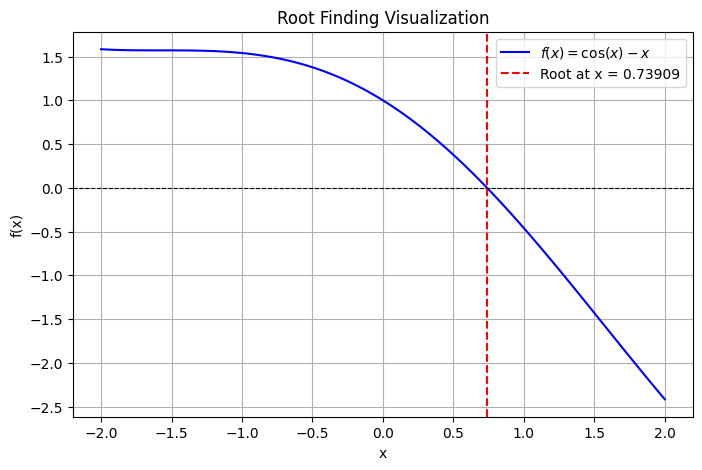

In [17]:
## Root Finding Problem Statement - Try It Exercises

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Define the function f(x) = cos(x) - x
f = lambda x: np.cos(x) - x

# Compute the root near x = -2 using fsolve
initial_guess = -2
root = optimize.fsolve(f, initial_guess)

# Verify the solution by evaluating f(root)
root_value = f(root)

# Print results
print(f"Computed root: {root[0]}")
print(f"Function value at root (should be close to 0): {root_value[0]}")

# Plot the function to visualize the root
x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(x) - x$', color='b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)  # x-axis
plt.axvline(root, color='r', linestyle='--', label=f'Root at x = {root[0]:.5f}')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Root Finding Visualization")
plt.grid(True)
plt


## Tolerance

### Introduction
In numerical methods, tolerance defines the acceptable level of error when approximating a solution. Since numerical computations cannot always achieve exact results, we establish a tolerance threshold to determine when an algorithm has converged to an approximate solution. For root-finding problems, we typically measure error using either $|f(x)| $, which checks how close the function value is to zero, or $|x_{i+1} - x_i| $, which measures the change between successive iterations. Choosing an appropriate tolerance is crucial, as overly strict tolerances can lead to unnecessary computations, while loose tolerances may result in inaccurate solutions.

<br>

In the next section, Python is used to implement and analyze different tolerance criteria.

In [12]:
## Tolerance in Root Finding

import numpy as np

# Example 1: Measuring error using |f(x)|
f = lambda x: x**2 - 2  # Function with root at sqrt(2)
tol = 1e-6  # Define a tolerance level

# Check if an approximate root satisfies the tolerance criteria
approx_root = 1.414  # A close approximation of sqrt(2)
error = abs(f(approx_root))

print("Using |f(x)| as error metric:")
print(f"Approximate root: {approx_root}")
print(f"Error |f(x)| = {error}")
print(f"Within tolerance? {'Yes' if error < tol else 'No'}")

# Example 2: Measuring error using |x_next - x_prev|
x_prev = 1.414
x_next = 1.41421  # Closer approximation
error_x = abs(x_next - x_prev)

print("\nUsing |x_next - x_prev| as error metric:")
print(f"Previous guess: {x_prev}")
print(f"Next guess: {x_next}")
print(f"Error |x_next - x_prev| = {error_x}")
print(f"Within tolerance? {'Yes' if error_x < tol else 'No'}")

# Extra Exploration: Choosing an appropriate tolerance
tolerances = [1e-1, 1e-3, 1e-6, 1e-9]
approximation = 1.414  # Example approximation of sqrt(2)

print("\nEffect of different tolerance levels:")
for t in tolerances:
    meets_criteria = abs(f(approximation)) < t
    print(f"Tolerance: {t:.1e}, Meets criteria? {'Yes' if meets_criteria else 'No'}")


Using |f(x)| as error metric:
Approximate root: 1.414
Error |f(x)| = 0.000604000000000271
Within tolerance? No

Using |x_next - x_prev| as error metric:
Previous guess: 1.414
Next guess: 1.41421
Error |x_next - x_prev| = 0.00021000000000004349
Within tolerance? No

Effect of different tolerance levels:
Tolerance: 1.0e-01, Meets criteria? Yes
Tolerance: 1.0e-03, Meets criteria? Yes
Tolerance: 1.0e-06, Meets criteria? No
Tolerance: 1.0e-09, Meets criteria? No


## Bisection Method

### Introduction
The Bisection Method is a numerical technique used to find the root of a function by repeatedly dividing an interval in half. It is based on the Intermediate Value Theorem , which states that if a continuous function $ f(x) $ changes sign over an interval $[a, b]$, then there must be at least one root in that interval. The method works by evaluating $ f(x) $ at the midpoint $ m = \frac{a + b}{2} $ and updating the interval based on the sign of $ f(m) $. This process continues iteratively until the root is found within a specified tolerance . The bisection method is reliable and always converges for continuous functions with a sign change, but it can be slow compared to other root-finding methods.

<br>

In the next section, the bisection method will be implemented in Python and applied to different functions.


In [13]:
## Bisection Method Implementation with Interval Updates and Final Analysis

import numpy as np

# Define the function whose root we want to find
f = lambda x: x**2 - 2  # Root at sqrt(2)

# Bisection method implementation
def my_bisection(f, a, b, tol):
    """
    Approximates a root of f(x) in the interval [a, b] using the Bisection Method.

    Parameters:
    f : function - The function whose root we seek.
    a, b : float - Interval endpoints (must satisfy f(a) * f(b) < 0).
    tol : float - The tolerance level for stopping.

    Returns:
    float - The approximate root of f(x).
    """
    # Ensure that a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("The scalars a and b do not bound a root")

    iteration = 0  # Track iteration count
    print(f"{'Iter':<5} {'a':<12} {'b':<12} {'m':<12} {'f(m)':<12}")

    while abs(b - a) > tol:
        m = (a + b) / 2  # Midpoint
        f_m = f(m)

        # Print current interval and midpoint
        print(f"{iteration:<5} {a:<12.6f} {b:<12.6f} {m:<12.6f} {f_m:<12.6f}")

        if abs(f_m) < tol:
            break  # Root found
        elif np.sign(f(a)) == np.sign(f_m):
            a = m  # Move left bound
        else:
            b = m  # Move right bound

        iteration += 1  # Increment iteration count

    root = (a + b) / 2  # Final root approximation
    return root

# Define interval and tolerance
a, b = 0, 2
tolerance = 1e-6

# Compute the root using bisection method
print("\n### Running Bisection Method With Tolerance 1e-6 ###\n")
root = my_bisection(f, a, b, tolerance)

# Print final result
print(f"\nFinal Approximate Root: {root:.9f}")
print(f"Function Value at Root: {f(root):.2e}")  # Should be close to zero

# Extra Exploration: Effect of different tolerance levels
tolerances = [1e-1, 1e-3, 1e-9]
print("\n### Effect of Different Tolerance Levels ###")

for tol in tolerances:
    root = my_bisection(f, a, b, tol)
    print(f"Tolerance: {tol:.1e}, Root: {root:.9f}, f(root): {f(root):.2e}")



### Running Bisection Method With Tolerance 1e-6 ###

Iter  a            b            m            f(m)        
0     0.000000     2.000000     1.000000     -1.000000   
1     1.000000     2.000000     1.500000     0.250000    
2     1.000000     1.500000     1.250000     -0.437500   
3     1.250000     1.500000     1.375000     -0.109375   
4     1.375000     1.500000     1.437500     0.066406    
5     1.375000     1.437500     1.406250     -0.022461   
6     1.406250     1.437500     1.421875     0.021729    
7     1.406250     1.421875     1.414062     -0.000427   
8     1.414062     1.421875     1.417969     0.010635    
9     1.414062     1.417969     1.416016     0.005100    
10    1.414062     1.416016     1.415039     0.002336    
11    1.414062     1.415039     1.414551     0.000954    
12    1.414062     1.414551     1.414307     0.000263    
13    1.414062     1.414307     1.414185     -0.000082   
14    1.414185     1.414307     1.414246     0.000091    
15    1.414185   

## Newton-Raphson Method

### Introduction
The Newton-Raphson Method is an efficient numerical technique for finding the roots of a function. Unlike the Bisection Method, which guarantees convergence but is slow, Newton-Raphson converges much faster when the initial guess is close to the true root. The method is based on using the tangent line at an initial guess $ x_0 $ to approximate the root. Each iteration follows the formula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

where $ f'(x) $ is the derivative of the function. The Newton step moves \( x_n \) closer to the root by following the slope of \( f(x) \). This process is repeated until the error is within a defined tolerance. Although the Newton-Raphson Method is powerful, it has limitations—it may fail to converge if the initial guess is poor or if $ f'(x) $ is close to zero.

<br>

In the next section, the Newton-Raphson Method will be implemented in Python and its behavior will be analyzed.

In [15]:
## Newton-Raphson Method Implementation

import numpy as np

# Define the function and its derivative
f = lambda x: x**2 - 2  # Root at sqrt(2)
df = lambda x: 2*x  # Derivative of f(x)

# Newton-Raphson method implementation
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Approximates a root of f(x) using the Newton-Raphson Method.

    Parameters:
    f : function - The function whose root we seek.
    df : function - The derivative of f(x).
    x0 : float - Initial guess.
    tol : float - The tolerance level for stopping.
    max_iter : int - Maximum number of iterations.

    Returns:
    float - The approximate root of f(x).
    """
    x = x0
    for i in range(max_iter):
        f_x = f(x)
        df_x = df(x)

        # Print iteration details
        print(f"Iter {i:2d}: x = {x:.9f}, f(x) = {f_x:.2e}, f'(x) = {df_x:.2e}")

        # Check stopping condition
        if abs(f_x) < tol:
            return x

        # Prevent division by zero
        if df_x == 0:
            raise ValueError("Derivative is zero. Newton-Raphson method failed.")

        # Newton step
        x = x - f_x / df_x

    raise ValueError("Newton-Raphson method did not converge within max_iter iterations.")

# Define initial guess and tolerance
x0 = 1.5
tolerance = 1e-6

# Compute the root using Newton-Raphson method
print("\n### Running Newton-Raphson Method ###\n")
root = newton_raphson(f, df, x0, tolerance)

# Print final result
print(f"\nFinal Approximate Root: {root:.9f}")
print(f"Function Value at Root: {f(root):.2e}")  # Should be close to zero

# Extra Exploration: Handling Poor Initial Guesses
print("\n### Handling a Poor Initial Guess ###")

try:
    bad_root = newton_raphson(f, df, x0=0.01, tol=1e-6)  # Poor guess close to zero
    print(f"Root found: {bad_root:.9f}")
except ValueError as e:
    print(f"Error: {e}")


### Running Newton-Raphson Method ###

Iter  0: x = 1.500000000, f(x) = 2.50e-01, f'(x) = 3.00e+00
Iter  1: x = 1.416666667, f(x) = 6.94e-03, f'(x) = 2.83e+00
Iter  2: x = 1.414215686, f(x) = 6.01e-06, f'(x) = 2.83e+00
Iter  3: x = 1.414213562, f(x) = 4.51e-12, f'(x) = 2.83e+00

Final Approximate Root: 1.414213562
Function Value at Root: 4.51e-12

### Handling a Poor Initial Guess ###
Iter  0: x = 0.010000000, f(x) = -2.00e+00, f'(x) = 2.00e-02
Iter  1: x = 100.005000000, f(x) = 1.00e+04, f'(x) = 2.00e+02
Iter  2: x = 50.012499500, f(x) = 2.50e+03, f'(x) = 1.00e+02
Iter  3: x = 25.026244751, f(x) = 6.24e+02, f'(x) = 5.01e+01
Iter  4: x = 12.553080428, f(x) = 1.56e+02, f'(x) = 2.51e+01
Iter  5: x = 6.356201936, f(x) = 3.84e+01, f'(x) = 1.27e+01
Iter  6: x = 3.335427625, f(x) = 9.13e+00, f'(x) = 6.67e+00
Iter  7: x = 1.967525444, f(x) = 1.87e+00, f'(x) = 3.94e+00
Iter  8: x = 1.492015362, f(x) = 2.26e-01, f'(x) = 2.98e+00
Iter  9: x = 1.416242067, f(x) = 5.74e-03, f'(x) = 2.83e+00
Iter 